# Спецификация к Лабораторной работе №11 

# Процедуры и функции. 
# Поиск экстремума среди трех значений
# (Вариант 22)

## Абстракция А0
### 1. Постановка задачи.
#### Задание: 
Написать две программы обработки трех двумерных массивов.

В первой версии программы использовать только процедуры общего вида. 

Во второй версии программы должна быть хотя бы одна функция. 

#### Условие: 
Найти сумму элементов для каждой из трех матриц.

Для каждой из матриц сформировать одномерный массив, 

равный по длине количеству строк матрицы и содержащий значения 0 или 1:

- 1, если в соответствующей строке элемент на главной диагонали больше других элементов этой строки;

- 0, если это условие для данной строки не выполняется.

Определить матрицу с максимальной суммой элементов.

### 2. Уточненная постановка задачи.
Даны матрицы $A, B, C$ с размерностями $n_A \times n_A, \ n_B \times n_B, \ n_C \times n_C$ .

Получить три массива $\{X_1, X_2, ..., X_{n_A}\}, \{X_1, X_2, ..., X_{n_B}\}, \{X_1, X_2, ..., X_{n_C}\}$ по правилу:
    
$\large{\displaystyle{X_i = \begin{cases}
1, \ Y_{ii} > Y_{ij}, \ \forall j: 0<j<n_Y+1 \land j \neq i\\
0, \ Y_{ii} \leq Y_{ij}, \ \exists j: 0<j<n_Y+1 \land j \neq i\\
\end{cases}, \ \forall i: 0<i<n_Y+1, \ \forall Y \in \{A, B, C\} }}$.

Найти $\large{\displaystyle{S_Y = \sum_{\substack{0<i<n_Y+1 \\ 0<j<n_Y+1}} Y_{ij}, \ \forall Y \in \{A, B, C\} }}$.

Определить $\large{\displaystyle{\max_{Y \in \{A, B, C\}} S_Y }}$.

### 3. Пример с иллюстрацией.

In [8]:
import numpy
import pylab 
%matplotlib inline
pylab.style.use('seaborn-whitegrid')

In [9]:
def write_datatxt(file_name, A, B, C):
    with open(file_name, 'w') as f:
        for Y in [A, B, C]:
            f.write("{}\n".format(Y.shape[0]))
            for i in range(Y.shape[0]):
                f.write("{}\n".format(Y[i]))

In [10]:
A1 = numpy.random.randint(-100, 100, size=(5,5))
B1 = numpy.random.randint(-100, 100, size=(4,4))
C1 = numpy.random.randint(-100, 100, size=(5,5))
print('\n', A1, '\n\n', B1, '\n\n', C1)
write_datatxt('ABC_Lab11_1.txt', A1, B1, C1)


 [[  85  -90   88  -38   42]
 [   2   64  -78  -40  -48]
 [-100   67    3   47   22]
 [ -38   73  -22  -65   12]
 [  51  -65  -65  -27  -95]] 

 [[-66  16  97 -57]
 [-25 -87  -1 -16]
 [ 33   6 -99  82]
 [  2  95  15 -97]] 

 [[-53  10  64 -27  73]
 [-90 -82 -28   1 -68]
 [  7 -94  52 -46 -98]
 [-75  93 -46  93 -73]
 [-79  45 -91   3  91]]


In [11]:
# Версия 1
print(20*' ' + 'Лаб.11\n' + 90*'=')

fin = str(input('Текстовый файл с элементами исходных матриц: '))
fout = str(input('Текстовый файл с элементами исходных матриц и результатами: '))
                
with open(fin, 'r') as f:
    Y = f.readlines()
NA = int(Y[0]); NB = int(Y[NA+1]); NC = int(Y[NA+NB+2])
A = [x[1:-2].split() for x in Y[1:NA+1]]
A = [[int(x) for x in A[i]] for i in range(NA)]
B = [x[1:-2].split() for x in Y[NA+2:NA+NB+2]]
B = [[int(x) for x in B[i]] for i in range(NB)]
C = [x[1:-2].split() for x in Y[NA+NB+3:]]
C = [[int(x) for x in C[i]] for i in range(NC)]
N = [NA, NB, NC]; Y = [A, B, C]; L = ['A', 'B', 'C']

X, S = 3 * [[0]], 3 * [0]
for k in range(3):
    X[k] = [int(sum([int(Y[k][j][i] < Y[k][i][i]) \
            for j in range(len(Y[k][i]))]) == len(Y[k]) - 1) \
            for i in range(len(Y[k]))]
    S[k] = sum([sum(Y[k][i]) for i in range(len(Y[k]))])
K = S.index(max(S))

print(90*'=' + '\n')
for i in range(3):
    print('Матрица ', L[i], ': \n')
    for j in range(N[i]):
        print(Y[i][j])
    print('\n' + 'Массив X{}: \n'.format(L[i]))
    print(X[i])
    print('\n' + 'Сумма элементов S{}: {}\n'.format(L[i], S[i]))
    print(90*'=' + '\n')
print('\n' + 'Матрица с максимальной суммой элементов: {}\n'.format(L[K]))

with open(fout, 'w') as f:        
    for i in range(3):
        f.write("{}\n".format(N[i]))
        for j in range(len(Y[i])):
            f.write("{}\n".format(Y[i][j]))
        f.write("{}\n".format(X[i]))
        f.write("{}\n".format(S[i]))     
    f.write("{}\n".format(L[K]))

                    Лаб.11
Текстовый файл с элементами исходных матриц: ABC_Lab11_1.txt
Текстовый файл с элементами исходных матриц и результатами: ABCXS_Lab11_1.txt

Матрица  A : 

[85, -90, 88, -38, 42]
[2, 64, -78, -40, -48]
[-100, 67, 3, 47, 22]
[-38, 73, -22, -65, 12]
[51, -65, -65, -27, -95]

Массив XA: 

[1, 0, 0, 0, 0]

Сумма элементов SA: -215


Матрица  B : 

[-66, 16, 97, -57]
[-25, -87, -1, -16]
[33, 6, -99, 82]
[2, 95, 15, -97]

Массив XB: 

[0, 0, 0, 0]

Сумма элементов SB: -102


Матрица  C : 

[-53, 10, 64, -27, 73]
[-90, -82, -28, 1, -68]
[7, -94, 52, -46, -98]
[-75, 93, -46, 93, -73]
[-79, 45, -91, 3, 91]

Массив XC: 

[0, 0, 0, 1, 1]

Сумма элементов SC: -418



Матрица с максимальной суммой элементов: B



In [12]:
# Версия 2
print(20*' ' + 'Лаб.11\n' + 90*'=')

fin = str(input('Текстовый файл с элементами исходных матриц: '))
fout = str(input('Текстовый файл с элементами исходных матриц и результатами: '))
                
def read_txt(file_name):
    with open(file_name, 'r') as f:
        Y = f.readlines()
    NA = int(Y[0]); NB = int(Y[NA+1]); NC = int(Y[NA+NB+2])
    A = [x[1:-2].split() for x in Y[1:NA+1]]
    A = [[int(x) for x in A[i]] for i in range(NA)]
    B = [x[1:-2].split() for x in Y[NA+2:NA+NB+2]]
    B = [[int(x) for x in B[i]] for i in range(NB)]
    C = [x[1:-2].split() for x in Y[NA+NB+3:]]
    C = [[int(x) for x in C[i]] for i in range(NC)]
    N = [NA, NB, NC]; Y = [A, B, C]; L = ['A', 'B', 'C']
    return N, Y, L
                
def find_XSK(Y):
    X, S = 3 * [[0]], 3 * [0]
    for k in range(3):
        X[k] = [int(sum([int(Y[k][j][i] < Y[k][i][i]) \
               for j in range(len(Y[k][i]))]) == len(Y[k]) - 1) \
               for i in range(len(Y[k]))]
        S[k] = sum([sum(Y[k][i]) for i in range(len(Y[k]))])
    K = S.index(max(S))
    return X, S, K

def write_txt(file_name, N, Y, L, X, S, K):
    with open(file_name, 'w') as f:        
        for i in range(3):
            f.write("{}\n".format(N[i]))
            for j in range(len(Y[i])):
                f.write("{}\n".format(Y[i][j]))
            f.write("{}\n".format(X[i]))
            f.write("{}\n".format(S[i]))     
        f.write("{}\n".format(L[K]))

N, Y, L = read_txt(fin)
X, S, K = find_XSK(Y)

print(90*'=' + '\n')
for i in range(3):
    print('Матрица ', L[i], ': \n')
    for j in range(N[i]):
        print(Y[i][j])
    print('\n' + 'Массив X{}: \n'.format(L[i]))
    print(X[i])
    print('\n' + 'Сумма элементов S{}: {}\n'.format(L[i], S[i]))
    print(90*'=' + '\n')
print('\n' + 'Матрица с максимальной суммой элементов: {}\n'.format(L[K]))  

write_txt(fout, N, Y, L, X, S, K)

                    Лаб.11
Текстовый файл с элементами исходных матриц: ABC_Lab11_1.txt
Текстовый файл с элементами исходных матриц и результатами: ABCXS_Lab11_1.txt

Матрица  A : 

[85, -90, 88, -38, 42]
[2, 64, -78, -40, -48]
[-100, 67, 3, 47, 22]
[-38, 73, -22, -65, 12]
[51, -65, -65, -27, -95]

Массив XA: 

[1, 0, 0, 0, 0]

Сумма элементов SA: -215


Матрица  B : 

[-66, 16, 97, -57]
[-25, -87, -1, -16]
[33, 6, -99, 82]
[2, 95, 15, -97]

Массив XB: 

[0, 0, 0, 0]

Сумма элементов SB: -102


Матрица  C : 

[-53, 10, 64, -27, 73]
[-90, -82, -28, 1, -68]
[7, -94, 52, -46, -98]
[-75, 93, -46, 93, -73]
[-79, 45, -91, 3, 91]

Массив XC: 

[0, 0, 0, 1, 1]

Сумма элементов SC: -418



Матрица с максимальной суммой элементов: B



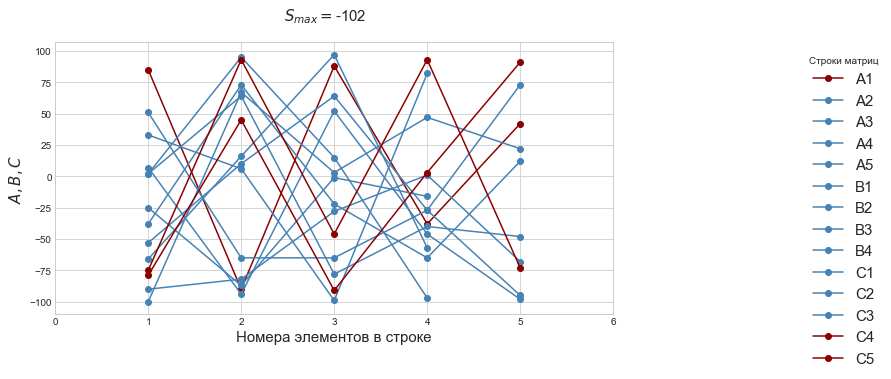

In [19]:
pylab.figure(figsize=(10,5))
col = ['steelblue', 'darkred']

for i in range(3):
    for j in range(N[i]):
        pylab.plot(range(len(Y[i][j])), Y[i][j], '-o', 
                   c=col[X[i][j]],label=L[i]+str(j+1))
        
pylab.suptitle(r'$S_{max} = $' + str(max(S)), fontsize=15)
pylab.xlabel('Номера элементов в строке', fontsize=15) 
pylab.ylabel(r'$A, B, C$', fontsize=15)
pylab.xticks(range(-1, max(N)+1), range(max(N)+2));
pylab.legend(title='Строки матриц', fontsize=15, shadow=True, 
             bbox_to_anchor=(1.5,1.0));